# Multi Layer Perceptron (MLP)

In this lab, you will be working with multiple classification problems, and experimenting how different aspects of the MLP.

Upon finishing the lab, I recommend you read about MLP on the Bishop book. as well as on the [tutorial](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) available on the scikit-learn website.

## Exercise 1 -- Load the datasets

* Load the `wine`, `breast cancer` datasets.
* Use scikit-learn to generate a 4-class classification problem with:
    * 10 featueres (6 informative ones, 4 redundant)
    * 2 clusters per class
    * 150 samples per class
* create a 70/30 train/test split for each of the datasets
* For each dataset, print a report with the following columns:
    * number of classes
    * number of samples per each class
    * number of features
    * total number of datapoints

**TIPA:** 
* use [dataclasses](https://docs.python.org/3/library/dataclasses.html) to simplify your life when handling collections of things that have the same structure
* to print nice tables, you can use the [rich](https://github.com/willmcgugan/rich) library

In [9]:
from sklearn.datasets import make_classification, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from rich.console import Console
from rich.table import Table
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib 

In [24]:
@dataclass
class DataSet:
    #essa é uma forma de expressar os argumentos da classe
    name:str
    X_train : np.ndarray
    X_test : np.ndarray
    y_train : np.ndarray
    y_test : np.ndarray

    def samples_per_class(self):
        samples = {}
        #Somando o total de amostra de cada classe
        #Levando em conta os dados de teste e de treino
        for l in np.unique(self.y_train):
            samples[str(l)] = self.X_train[self.y_train == l].shape[0]
            samples[str(l)] += self.X_test[self.y_test == l].shape[0]
        return samples

    def total_datapoints(self):
        return self.y_train.shape[0] + self.y_test.shape[0]

    def classes(self):
        return np.unique(self.y_test)
    
    def n_features(self):
        return self.X_train.shape[0]

datasets = []

In [25]:
#Essa estrela ao lado de load_wine() faz as funções interpretarem tuplas como uma lista de argumentos.

#wine dataset
X_train, X_test, y_train, y_test = train_test_split(*load_wine(return_X_y=True), test_size=0.3, random_state=0)
datasets.append(DataSet('Wine', X_train, X_test, y_train, y_test))

#breast cancer
X_train, X_test, y_train, y_test = train_test_split(*load_breast_cancer(return_X_y=True), test_size=0.3, random_state=0)
datasets.append(DataSet('Breast Cancer', X_train, X_test, y_train, y_test))

# generated dataset
# 600 amostras, 4 classes, 10 features, 6 linearmente independentes e 4 redundantes
data_generated = make_classification( n_samples=600, n_classes=4, n_features=10, n_informative=6, n_redundant=4, random_state=0)
data_generated

X_train, X_test, y_train, y_test = train_test_split(*data_generated, test_size= 0.3, random_state=0)
datasets.append(DataSet('Generated Dataset', X_train, X_test, y_train, y_test))



In [26]:
datasets.append(DataSet("Generated Dataset", X_train, X_test, y_train, y_test))

#Plotando um tabela bonitinha
console = Console()
table = Table(show_header=True,
              title="Dataset information",
              header_style="bold green")
table.add_column("Dataset")
table.add_column("Number of classes")
table.add_column("Samples per class")
table.add_column("Number of features")
table.add_column("Number of datapoints")

for ds in datasets:
    table.add_row(ds.name,
                  str(ds.classes().shape[0]),
                  str(ds.samples_per_class()),
                  str(ds.n_features()),
                  str(ds.total_datapoints()))

console.print(table)

                                     Dataset information                                     
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Dataset         ┃ Number of       ┃ Samples per      ┃ Number of       ┃ Number of        ┃
┃                 ┃ classes         ┃ class            ┃ features        ┃ datapoints       ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Wine            │ 3               │ {'0': 59, '1':   │ 124             │ 178              │
│                 │                 │ 71, '2': 48}     │                 │                  │
│ Breast Cancer   │ 2               │ {'0': 212, '1':  │ 398             │ 569              │
│                 │                 │ 357}             │                 │                  │
│ Generated       │ 4               │ {'0': 148, '1':  │ 420             │ 600              │
│ Dataset         │                 │ 152, '2': 150,   │                 │                  │
│                 │                 │ '3': 150}        │                 │                  │
│ Generated       │ 4               │ {'0': 148, '1':  │ 420             │ 600              │
│ Dataset         │                 │ 152, '2': 150,   │                 │                  │
│                 │                 │ '3': 150}        │                 │                  │
└─────────────────┴─────────────────┴──────────────────┴─────────────────┴──────────────────┘

In [13]:
# your code here 

## Exercise 2 -- The effect of multiple activation functions

* For each dataset, try the different activation functions available in sklearn
    * With and without a min-max normalization
* Plot the training loss at each epoc for every activation function (with and without normalization). You can make one figure per dataset, or a single figure with an axis per dataset
* Print a table with:
    * The dataset
    * the activation function
    * the normalization used
    * the test mean accuracy 

*TIP:* many of the models will not converge with default parameters, I chose to suppress the warnings, but you can choose to run more iterations if you prefer

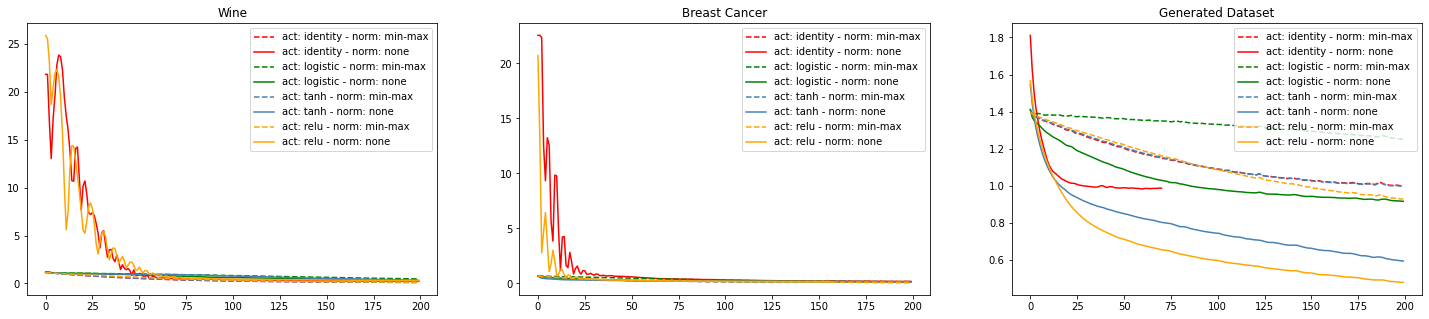

                             Activation comparison                              
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Dataset           ┃ Activation Function ┃ Normalization ┃ Test Mean Accuracy ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wine              │ identity            │ min-max       │ 0.963              │
│ Wine              │ identity            │ none          │ 0.926              │
│ Wine              │ logistic            │ min-max       │ 0.926              │
│ Wine              │ logistic            │ none          │ 0.944              │
│ Wine              │ tanh                │ min-max       │ 0.963              │
│ Wine              │ tanh                │ none          │ 0.889              │
│ Wine              │ relu                │ min-max       │ 0.963              │
│ Wine              │ relu                │ none          │ 0.926              │
│ Breast Cancer     │ identity            │ min-max       │ 0.860              │
│ Breast Cancer     │ identity            │ none          │ 0.953              │
│ Breast Cancer     │ logistic            │ min-max       │ 0.895              │
│ Breast Cancer     │ logistic            │ none          │ 0.959              │
│ Breast Cancer     │ tanh                │ min-max       │ 0.860              │
│ Breast Cancer     │ tanh                │ none          │ 0.936              │
│ Breast Cancer     │ relu                │ min-max       │ 0.871              │
│ Breast Cancer     │ relu                │ none          │ 0.965              │
│ Generated Dataset │ identity            │ min-max       │ 0.494              │
│ Generated Dataset │ identity            │ none          │ 0.556              │
│ Generated Dataset │ logistic            │ min-max       │ 0.383              │
│ Generated Dataset │ logistic            │ none          │ 0.583              │
│ Generated Dataset │ tanh                │ min-max       │ 0.494              │
│ Generated Dataset │ tanh                │ none          │ 0.711              │
│ Generated Dataset │ relu                │ min-max       │ 0.533              │
│ Generated Dataset │ relu                │ none          │ 0.678              │
└───────────────────┴─────────────────────┴───────────────┴────────────────────┘

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
from itertools import product
import warnings

def compare_activations(dataset, ax, table):
    ax.set_title(dataset.name)
    
    colors = ['red', 'green', 'steelblue', 'orange']
    activations = ['identity', 'logistic', 'tanh', 'relu']
    
    norms = ['min-max', 'none']
    line_styles = ['--', '-']
    
    X_train_norm = MinMaxScaler().fit_transform(dataset.X_train)
    X_test_norm = MinMaxScaler().fit_transform(dataset.X_test)
    

    for activation, norm in product(activations, norms):
        # Criando o multilayer perceptroi
        # Em cada iteração definindo uma função de ativação diferente
        mlp = MLPClassifier(random_state=0, activation=activation)
        # Normalizando os dados
        X_train = X_train_norm if norm == 'min-max' else dataset.X_train
        X_test = X_test_norm if norm == 'min-max' else dataset.X_test
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            #Modelo aos dados                                    
            mlp.fit(X_train, dataset.y_train)

        col = colors[activations.index(activation)]
        ls = line_styles[norms.index(norm)]

        ax.plot(mlp.loss_curve_, label=f'act: {activation} - norm: {norm}', c=col, ls=ls)
        ax.legend()
        table.add_row(dataset.name,
                      activation,
                      norm,
                      f'{mlp.score(X_test, dataset.y_test):.3f}')


table = Table(show_header=True, 
              title="Activation comparison",
              header_style="bold green")
table.add_column("Dataset")
table.add_column("Activation Function")
table.add_column("Normalization")
table.add_column("Test Mean Accuracy")

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
for ax, dataset in zip(axs.ravel(), datasets):
    compare_activations(dataset, ax, table)
plt.show()
plt.close('all')
console.print(table)

ERROR: Could not find a version that satisfies the requirement intertools (from versions: none)
ERROR: No matching distribution found for intertools


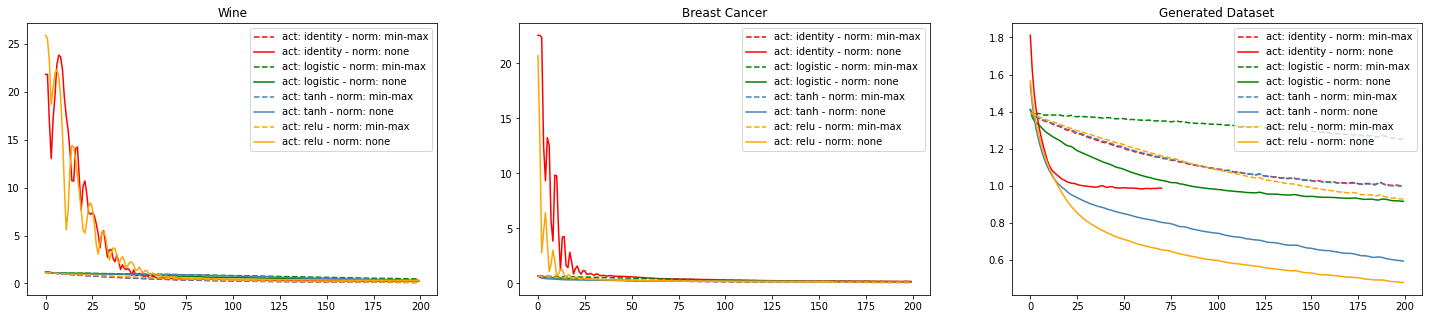

                             Activation comparison                              
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Dataset           ┃ Activation Function ┃ Normalization ┃ Test Mean Accuracy ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wine              │ identity            │ min-max       │ 0.963              │
│ Wine              │ identity            │ none          │ 0.926              │
│ Wine              │ logistic            │ min-max       │ 0.926              │
│ Wine              │ logistic            │ none          │ 0.944              │
│ Wine              │ tanh                │ min-max       │ 0.963              │
│ Wine              │ tanh                │ none          │ 0.889              │
│ Wine              │ relu                │ min-max       │ 0.963              │
│ Wine              │ relu                │ none          │ 0.926              │
│ Breast Cancer     │ identity            │ min-max       │ 0.860              │
│ Breast Cancer     │ identity            │ none          │ 0.953              │
│ Breast Cancer     │ logistic            │ min-max       │ 0.895              │
│ Breast Cancer     │ logistic            │ none          │ 0.959              │
│ Breast Cancer     │ tanh                │ min-max       │ 0.860              │
│ Breast Cancer     │ tanh                │ none          │ 0.936              │
│ Breast Cancer     │ relu                │ min-max       │ 0.871              │
│ Breast Cancer     │ relu                │ none          │ 0.965              │
│ Generated Dataset │ identity            │ min-max       │ 0.494              │
│ Generated Dataset │ identity            │ none          │ 0.556              │
│ Generated Dataset │ logistic            │ min-max       │ 0.383              │
│ Generated Dataset │ logistic            │ none          │ 0.583              │
│ Generated Dataset │ tanh                │ min-max       │ 0.494              │
│ Generated Dataset │ tanh                │ none          │ 0.711              │
│ Generated Dataset │ relu                │ min-max       │ 0.533              │
│ Generated Dataset │ relu                │ none          │ 0.678              │
└───────────────────┴─────────────────────┴───────────────┴────────────────────┘

In [2]:
# your code here

## Exercise 3 -- The effect of the hidden layers

* Similarly to exercise 2, try the effect of the followinw MLP configurations
    * 1 hidden layer with 100 units
    * 2 hidden layers with 50 units each
    * 3 hidden layers with 30 units each
* Plot the training loss at each epoc for every configuration. You can make one figure per dataset, or a single figure with an axis per dataset
* Print a table with:
    * The dataset
    * The configuration of the MLP
    * the test mean accuracy

*TIP:* many of the models will not converge with default parameters, I chose to suppress the warnings, but you can choose to run more iterations if you prefer

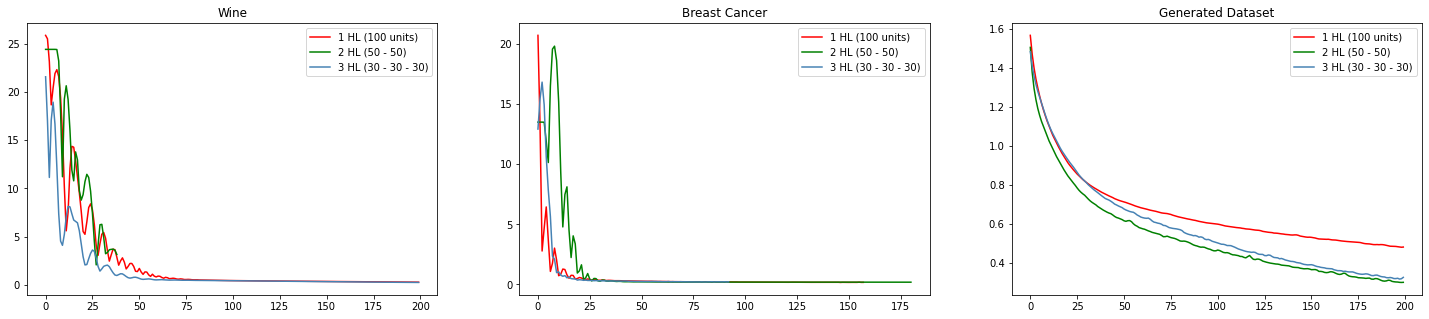

                     Activation comparison                      
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Dataset           ┃ Configuration       ┃ Test Mean Accuracy ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wine              │ 1 HL (100 units)    │ 0.926              │
│ Wine              │ 2 HL (50 - 50)      │ 0.444              │
│ Wine              │ 3 HL (30 - 30 - 30) │ 0.907              │
│ Breast Cancer     │ 1 HL (100 units)    │ 0.965              │
│ Breast Cancer     │ 2 HL (50 - 50)      │ 0.947              │
│ Breast Cancer     │ 3 HL (30 - 30 - 30) │ 0.947              │
│ Generated Dataset │ 1 HL (100 units)    │ 0.678              │
│ Generated Dataset │ 2 HL (50 - 50)      │ 0.728              │
│ Generated Dataset │ 3 HL (30 - 30 - 30) │ 0.722              │
└───────────────────┴─────────────────────┴────────────────────┘

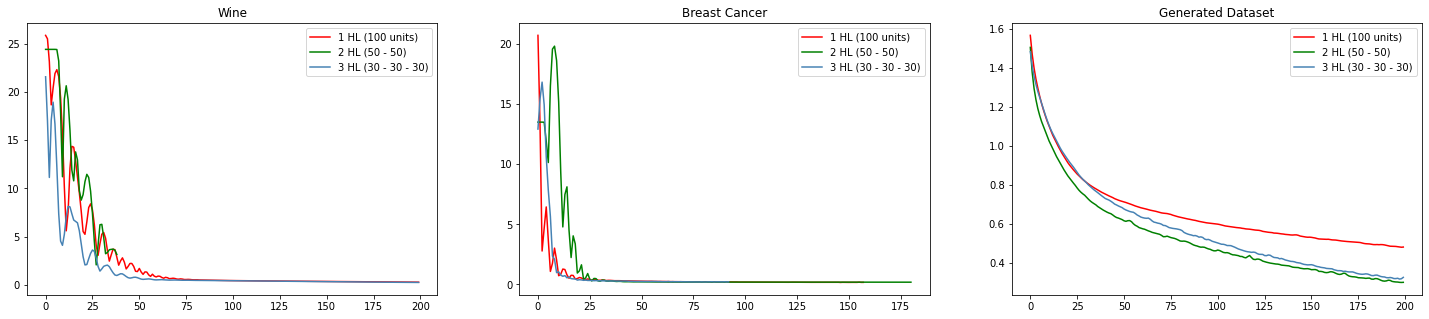

                                    Activation comparison                                    
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Dataset       ┃ Configuration  ┃ Test Mean     ┃ Dataset ┃ Configuration ┃ Test Mean      ┃
┃               ┃                ┃ Accuracy      ┃         ┃               ┃ Accuracy       ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Wine          │ 1 HL (100      │ 0.926         │         │               │                │
│               │ units)         │               │         │               │                │
│ Wine          │ 2 HL (50 - 50) │ 0.444         │         │               │                │
│ Wine          │ 3 HL (30 - 30  │ 0.907         │         │               │                │
│               │ - 30)          │               │         │               │                │
│ Breast Cancer │ 1 HL (100      │ 0.965         │         │               │                │
│               │ units)         │               │         │               │                │
│ Breast Cancer │ 2 HL (50 - 50) │ 0.947         │         │               │                │
│ Breast Cancer │ 3 HL (30 - 30  │ 0.947         │         │               │                │
│               │ - 30)          │               │         │               │                │
│ Generated     │ 1 HL (100      │ 0.678         │         │               │                │
│ Dataset       │ units)         │               │         │               │                │
│ Generated     │ 2 HL (50 - 50) │ 0.728         │         │               │                │
│ Dataset       │                │               │         │               │                │
│ Generated     │ 3 HL (30 - 30  │ 0.722         │         │               │                │
│ Dataset       │ - 30)          │               │         │               │                │
└───────────────┴────────────────┴───────────────┴─────────┴───────────────┴────────────────┘

In [36]:
colors = ['red', 'green', 'steelblue', 'orange']
def compare_configurations(dataset, ax, table):
    ax.set_title(dataset.name)
    #Dicionário com as configruações do modelo
    configurations = {
        '1 HL (100 units)': (100,), #Um modelo com 100 unidades e 1 camada
        '2 HL (50 - 50)': (50,50),  #com 50 unidades e 2 camadas
        '3 HL (30 - 30 - 30)': (30,30,30), #com 30 unidades e 3 camadas
    }

    for color_index, (name, configuration) in enumerate(configurations.items()):
        # definindo vários modelos
        # Cada um com um número de camadas diferentes
        mlp = MLPClassifier(random_state=0,                             hidden_layer_sizes=configuration)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            # Fazendo o fit dos dados
            mlp.fit(dataset.X_train, dataset.y_train)

        col = colors[color_index]

        ax.plot(mlp.loss_curve_, label=name, c=col)
        ax.legend()
        table.add_row(dataset.name,
                      name,
                      #Definindo a acurácia do modelo
                      f'{mlp.score(dataset.X_test, dataset.y_test):.3f}')

table = Table(show_header=True, 
              title="Activation comparison",
              header_style="bold green")
table.add_column("Dataset")
table.add_column("Configuration")
table.add_column("Test Mean Accuracy")

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
for ax, dataset in zip(axs.ravel(), datasets):
    compare_configurations(dataset, ax, table)
plt.show()
plt.close('all')
console.print(table)
table.add_column("Dataset")
table.add_column("Configuration")
table.add_column("Test Mean Accuracy")

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
for ax, dataset in zip(axs.ravel(), datasets):
    compare_configurations(dataset, ax, table)
plt.show()
plt.close('all')
console.print(table)


        

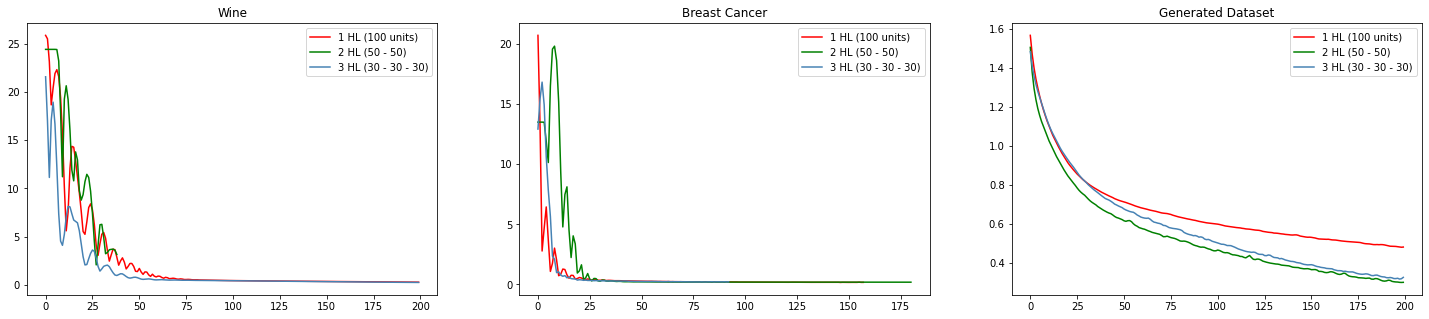

                     Activation comparison                      
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Dataset           ┃ Configuration       ┃ Test Mean Accuracy ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wine              │ 1 HL (100 units)    │ 0.926              │
│ Wine              │ 2 HL (50 - 50)      │ 0.444              │
│ Wine              │ 3 HL (30 - 30 - 30) │ 0.907              │
│ Breast Cancer     │ 1 HL (100 units)    │ 0.965              │
│ Breast Cancer     │ 2 HL (50 - 50)      │ 0.947              │
│ Breast Cancer     │ 3 HL (30 - 30 - 30) │ 0.947              │
│ Generated Dataset │ 1 HL (100 units)    │ 0.678              │
│ Generated Dataset │ 2 HL (50 - 50)      │ 0.728              │
│ Generated Dataset │ 3 HL (30 - 30 - 30) │ 0.722              │
└───────────────────┴─────────────────────┴────────────────────┘

In [3]:
# your code here

# Further reading (and testing):

Please read the following examples, and implement them on the 3 datasets you've loaded:
* [Comparing learning strategies](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)
* [The effects of different regularization levels in MLPs](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py)
* [Visualization of MLP weights on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py)